In [ ]:
# in this lab we are going to see how implement a
# Linear regression in Python

In [ ]:
!pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = wb.data.DataFrame(['NY.GDP.PCAP.PP.KD', 'SP.DYN.LE00.IN'], time=range(2018,2020,1))
df = df.reset_index().pivot(index='economy', columns='series')
df.columns = [ncol[1][3:6] + ncol[0][2:] for ncol in df.columns]
df.head()

,GDP2018,DYN2018,GDP2019,DYN2019
economy,,,,
ABW,40706.749510,76.072000,40780.516569,76.248000
AFE,3661.769172,63.365858,3648.708762,63.755674
AFG,2060.698973,63.081000,2079.921861,63.565000
AFW,4063.464359,57.189139,4092.028643,57.555796
AGO,6878.593482,62.144000,6602.423657,62.448000


In [ ]:
df.dropna(inplace=True) ## Removemos los missing values

print(df['DYN2019'].isnull().sum())  # CHECK
print(df['GDP2019'].isnull().sum())  # CHECK

0
0


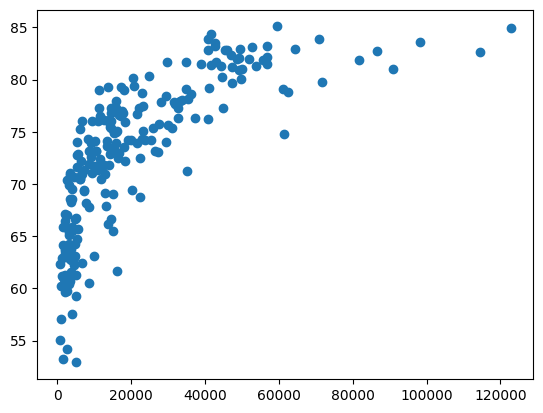

In [ ]:
plt.scatter(df['GDP2019'], df['DYN2019'])

In [ ]:
df.corr()

,GDP2018,DYN2018,GDP2019,DYN2019
GDP2018,1.000000,0.731673,0.999491,0.734467
DYN2018,0.731673,1.000000,0.736865,0.999013
GDP2019,0.999491,0.736865,1.000000,0.739840
DYN2019,0.734467,0.999013,0.739840,1.000000


In [ ]:
import math
import numpy as np

In [ ]:
df = df.apply(lambda x: np.log(x))

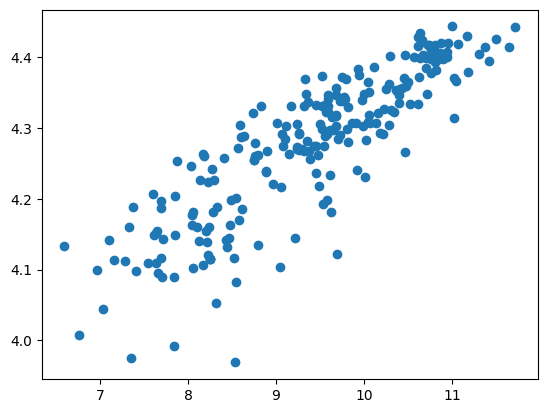

In [ ]:
plt.scatter(df['GDP2019'], df['DYN2019'])

In [ ]:
df.corr()

,GDP2018,DYN2018,GDP2019,DYN2019
GDP2018,1.000000,0.862830,0.999651,0.861971
DYN2018,0.862830,1.000000,0.865100,0.999038
GDP2019,0.999651,0.865100,1.000000,0.864402
DYN2019,0.861971,0.999038,0.864402,1.000000


In [ ]:
import numpy as np
import statsmodels.api as sm
X  = df['GDP2019']
X = sm.add_constant(X, prepend=False)
# if the variables are logaritmically then are interpreted as elasticities..
mod=sm.OLS(df['DYN2019'], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                DYN2019   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     682.7
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           6.38e-71
Time:                        20:34:41   Log-Likelihood:                 356.20
No. Observations:                 233   AIC:                            -708.4
Df Residuals:                     231   BIC:                            -701.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP2019        0.0805      0.003     26.129      0.0

In [ ]:
df['GDP2019'].std()

1.12218177763416